# Task 3

**Visualization of the cloud & aerosol classification mask for one day of measurements from our Cloudnet site. Presentation of the visualization and a listing of the global file attributes on an html page.**

Wenfu Sun 2021-07-01

## 1. Load modules

Here I use the `xarray` to process the netcdf file

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.colors as mcolors

## 2. Data preparation

In [2]:
# Read nc file
file_name = '20151022_leipzig_classification.nc'
file_path = os.path.join('Data', '03-Visualization_of_target_classification_mask', file_name)
nc_file = xr.open_dataset(file_path)

In [3]:
# Get the variable 'target_classification' and transpose the array into (time, height)
TC = nc_file.target_classification
TC = TC.transpose()

# Convert the unit of height dimension from meter to kilometer
TC['height'] = TC['height']/1e3
TC

<xarray.DataArray 'target_classification' (height: 488, time: 2879)>
[1404952 values with dtype=int8]
Coordinates:
  * time     (time) datetime64[ns] 2015-10-22T00:00:15.000000782 ... 2015-10-...
  * height   (height) float32 0.2729 0.3041 0.3353 0.3664 ... 15.39 15.43 15.46
Attributes:
    long_name:         Target classification
    comment:           This variable is a simplification of the bitfield "cat...
    plot_range:        [ 0 10]
    definition:        0: Clear sky\n1: Cloud droplets only\n2: Drizzle or ra...
    long_definition:   0: Clear sky\n1: Cloud liquid droplets only\n2: Drizzl...
    legend_key_red:    [1.  0.4 1.  0.  1.  0.  1.  0.  0.8 0.6 0.4]
    legend_key_green:  [1.  0.8 0.  0.  0.9 0.8 0.6 0.6 0.8 0.6 0.4]
    legend_key_blue:   [1.  1.  0.  1.  0.  0.  0.  0.6 0.8 0.6 0.4]

In [4]:
# Get the list of definitions of the target_classification
targets_list = [i.split('\n')[0] for i in TC.attrs['definition'].split(': ')][1:]
targets_list

['Clear sky',
 'Cloud droplets only',
 'Drizzle or rain',
 'Drizzle/rain & cloud droplets',
 'Ice',
 'Ice & supercooled droplets',
 'Melting ice',
 'Melting ice & cloud droplets',
 'Aerosol',
 'Insects',
 'Aerosol & insects']

## 3. Image plot

Here I use `matplotlib` to plot the figure.

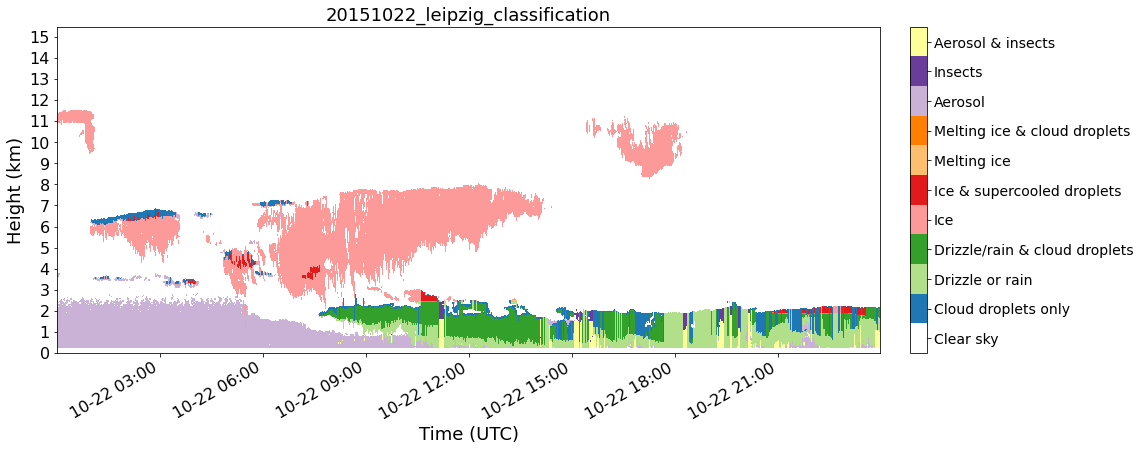

In [5]:
# Build a list of custom colormap.
c_map = mcolors.ListedColormap(['#ffffff','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99'])

# Set the figsize, initialize an axe, and plot the target-classification
fig = plt.figure(figsize=(18, 6))
ax  = plt.axes()
im  = TC.plot(ax=ax, add_colorbar=False, cmap=c_map)

# Set the date format, x-ticks, and the label of x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.xticks(fontsize=16)
ax.set_xlabel('Time (UTC)',fontsize=18)

# Add the colorbar, and set ticks of colorbar
cb  = plt.colorbar(im, orientation="vertical", pad=0.03, shrink=1.00, 
                   boundaries=np.arange(-0.5, 11.5, 1).tolist(), 
                   ticks=np.arange(11))
ctick = cb.ax.set_yticklabels(targets_list,fontsize=14)

# Set y-ticks and the label of y-axis
plt.yticks(np.arange(0,16,1).tolist(),fontsize=16)
ax.set_ylabel('Height (km)',fontsize=18)

# Set the main title of the image
plt.title(os.path.splitext(file_name)[0], fontsize=18)

# Save the plot with a png format
os.makedirs('Results', exist_ok=True)
fig_path = os.path.join('Results', f'T03_{os.path.splitext(file_name)[0]}.png')
plt.savefig(fig_path, bbox_inches='tight', dpi=150)                                                            

## 4. Create the static html page

Here I write the static html page in this python file, so that **the title and content in the webpage can be changed according to the loaded data automatically**.

In [6]:
# Get global attributions
global_attrs = nc_file.attrs
# Make the static html page
with open(os.path.join('Results', f'T03_{os.path.splitext(file_name)[0]}.html'), 'w') as file:
    # Html start
    file.write('<html>')
    # Html title set
    file.write('<head>')
    file.write(f'<title>{os.path.splitext(file_name)[0]}</title>')
    file.write('</head>')
    
    # Html body start
    file.write('<body>')
    # Html heading
    file.write(f'<h1>{os.path.splitext(file_name)[0]}</h1>')
    # Insert the image
    file.write(f'<img src= "./T03_{os.path.splitext(file_name)[0]}.png" alt="{os.path.splitext(file_name)[0]}" width="1200">')
    # Insert the table and set the table title
    file.write('<table border="1" width="1200">')
    file.write('<caption>Global Attributes</caption>')
    # Loop the global attributions and fill the table
    for i in global_attrs: 
        file.write('<tr>')
        file.write('<td>'+i+'</td>')
        file.write('<td>'+str(global_attrs[i])+'</td>')
        file.write('</tr>')    
    file.write('</table>')    
    # Html body end
    file.write('</body>')
    
    # Html end
    file.write('</html>')